### 1. Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Linear Regression - Identifies linear relationships between dependent and independent variables.  Example: How do square footage and number of stores in the area effect house price? If 2500 sq ft and 3 stores predict price of house.  These identify a straight line to fit the model with a y-intercept and a slope.  The formula is y=mx + b.  This model is evaluated best using either r-squared, mean squared error/root mean squared error, or mean absolute error.  These evaluations are all based upon the difference between predicted values and actual values.

Logistic Regression/Classification - Identifies relationships between dependent and independent variables when the answer is binary or falls into a category.  Example: Does this person have diabetes? Answer will be yes or no.  This looks like an S shaped curve on the graph. The best way to evaluate the model is to use a confusion matrix to identify correctly and incorrectly predicted categories.  The dataset and the question you are trying to answer will determine your goals of either high precision or high recall.

Support Vector Machine - Attempts to identify a hyperplane that separates the two classes of data points. The goal is to have the hyperplane be at the maximum distance from the two classes. The support vectors are the data points that are closest to the hyperplane and influence the position and slope of the plane.  The way to evaluate this  model is with an accuracy score.

K Nearest Neighbor - Classifies data points based upon the classes of the data points nearest to it.  Uses Euclidean distance.  This model must have the number of neighbors to be used specified. This should be decided by evaluating accuracy at different numbers of neighbors and stopping when a global maximum is reached.  The accuracy can change based op the n_neighbors used.  This model should be evaluated using accuracy, precision and recall.

Decision Trees - Classifies data points based upon the features in a branch and leaf method.  It looks at a feature and splits the data according to criteria.  It continues to split data into smaller and smaller branches until it no longer makes sense to split or it hits a specified parameter that is put into the model.  Evaluate this model using accuracy, precision and recall. 

Random Forest - Ensemble method using multiple decision trees to classify data points and then each tree gets a "vote". Use roc auc to evaluate performance because it is used to plot True Positive Rate against False Positive Rates and reflect the probability that a datapoint will be correctly classified at various threshholds. It is a better measure than just accuracy when the class sizes are not largely imbalanced

Neural Networks - A neural network is machine learning made up of at least three layers: the input layer, a hidden layer, and the output layer. A neural network containing more than one hidden layer is said to be performing "deep learning". The neural network takes the values from the input layer, and applies specified weights to them, and then calculates the results of their interactions with each other. This calculation of weights and interactions happens at each layer until you reach the output layer, which is actually the prediction. You can check the performance of your model using validation scores. You can run epochs using optimization methods to determine the point at which you minimize your loss function. The performance of your model at that point is maximized.

### 2. Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

KMeans - This is a method of clustering data.  An example of this might be inputting store data and purchases.  Some customers could be grouped together with similar customers.  This information could be applied to target groups with certain marketing, etc.  The number of clusters to use can be determined using the elbow method of inertia and distortion.  You run the model using different numbers of clusters and then plot the inertia and distortion at each run.  The correct number of clusters to use is the last one before rates become constant (the number of clusters at the elbow).

Hierarchichal Clustering - Clustering can be done top down (divisive) or bottom up (agglomerative). This is typically done bottom up and involves linking groups based on similarity.  There are four ways to determine linkage and these must be specified in the model.  They are:   
    Ward’s linkage: The distance between two clusters is defined by the increase in the sum of squared after the clusters  are merged.
    Average linkage: This method is defined by the mean distance between two points in each cluster
    Complete (or maximum) linkage: This method is defined by the maximum distance between two points in each cluster
    Single (or minimum) linkage: This method is defined by the minimum distance between two points in each cluster
The number of clusters to be used should be decided by drawing a line in the resulting dendogram through the tallest vertical line.  The number of vertical lines that the horizontal line drawn bisects is the number of clusters you should have.    


### 3. Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

#### Nulls were only present in Description and Customer ID.  I removed the Description column altogether as the information was also contained in StockCode.  I removed the rows containing nulls in CustomerID, as those transactions were all item returns.  I used OneHotEncoding to handle Country categories, but I restricted my run to only the top 5 countries of customers, as that is where the vast majority of customers are located.

Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Removing unnecessary columns- description is unnecessary as stock code captures the information here.

In [2]:
df_cleaned=df.drop(columns=['Description'])

Remove outliers

In [3]:
df_clean=df_cleaned.copy()
# IQR
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df_clean = df_clean[~((df_clean < (Q1 - 2.5 * IQR)) |(df_clean > (Q3 + 2.5 * IQR))).any(axis=1)]
df_clean.shape

Quantity         9.00
UnitPrice        2.88
CustomerID    2838.00
dtype: float64


(495450, 7)

Check nulls - I dropped nulls in this case as most contained very little information except that the transaction was a return of inventory 

In [4]:
df_clean.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     123198
Country             0
dtype: int64

In [5]:
df_clean=df_clean.dropna()
df_clean.describe()

,Quantity,UnitPrice,CustomerID
count,372252.000000,372252.000000,372252.000000
mean,7.084411,2.648179,15312.563374
std,7.042468,2.243075,1709.538711
min,-21.000000,0.000000,12347.000000
25%,2.000000,1.250000,13985.000000
50%,4.000000,1.950000,15208.000000
75%,12.000000,3.750000,16813.000000
max,32.000000,11.170000,18287.000000


Transform features

First converted the StockCode and InvoiceNo to numbers only

In [6]:
df_clean['StockCode'] = pd.to_numeric(df_clean['StockCode'].str.replace('[^0-9]', ''))
df_clean['InvoiceNo'] = pd.to_numeric(df_clean['InvoiceNo'].str.replace('[^0-9]', ''))
df_clean

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053.0,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406.0,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029.0,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029.0,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613.0,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899.0,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254.0,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255.0,4,12/9/2011 12:50,4.15,12680.0,France


Checked for newly empty values in those columns.  These contained non-purchase information such as postage cost and discounts

In [7]:
df_clean.isnull().sum()
df_clean=df_clean.dropna()

Dealing with categorical values

In [8]:
df_clean['Country'].value_counts()

United Kingdom          334627
Germany                   8448
France                    7530
EIRE                      6262
Spain                     2275
Belgium                   1828
Switzerland               1630
Portugal                  1372
Norway                     875
Netherlands                730
Italy                      721
Channel Islands            690
Australia                  651
Finland                    579
Cyprus                     554
Austria                    362
Poland                     311
Denmark                    308
Sweden                     266
USA                        252
Unspecified                231
Israel                     214
Iceland                    170
Singapore                  167
Japan                      161
Greece                     137
Canada                     137
Malta                      119
United Arab Emirates        59
European Community          53
RSA                         52
Lebanon                     39
Brazil  

Created a new df with only the top five countries worth of sales

In [9]:
df_clean=df_clean.loc[df_clean['Country'].isin(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'])]
df_clean

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053.0,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406.0,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029.0,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029.0,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613.0,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899.0,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254.0,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255.0,4,12/9/2011 12:50,4.15,12680.0,France


Converted InvoiceDate to date time values

In [10]:
df_clean.dtypes

InvoiceNo        int64
StockCode      float64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
import datetime as dt

df_clean['InvoiceDate']=pd.to_datetime(df_clean['InvoiceDate'])
df_clean['InvoiceDate']=df_clean['InvoiceDate'].map(dt.datetime.toordinal)

In [12]:
df_clean.dtypes

InvoiceNo        int64
StockCode      float64
Quantity         int64
InvoiceDate      int64
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

OneHotEncoding done on remaining countries category information

In [13]:
df_ohe=pd.get_dummies(df_clean)
df_ohe

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_EIRE,Country_France,Country_Germany,Country_Spain,Country_United Kingdom
0,536365,85123.0,6,734107,2.55,17850.0,0,0,0,0,1
1,536365,71053.0,6,734107,3.39,17850.0,0,0,0,0,1
2,536365,84406.0,8,734107,2.75,17850.0,0,0,0,0,1
3,536365,84029.0,6,734107,3.39,17850.0,0,0,0,0,1
4,536365,84029.0,6,734107,3.39,17850.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,12,734480,0.85,12680.0,0,1,0,0,0
541905,581587,22899.0,6,734480,2.10,12680.0,0,1,0,0,0
541906,581587,23254.0,4,734480,4.15,12680.0,0,1,0,0,0
541907,581587,23255.0,4,734480,4.15,12680.0,0,1,0,0,0


Checking for correlation - InvoiceNo and InvoiceDate are correlated so I will drop InvoiceDate.

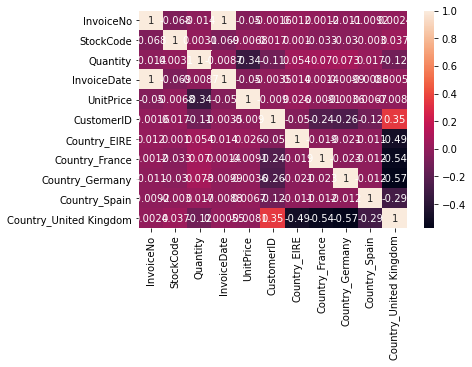

In [14]:
import seaborn as sn
corrMatrix = df_ohe.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
df_ohe = df_ohe.drop('InvoiceDate', axis=1)
df_ohe

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country_EIRE,Country_France,Country_Germany,Country_Spain,Country_United Kingdom
0,536365,85123.0,6,2.55,17850.0,0,0,0,0,1
1,536365,71053.0,6,3.39,17850.0,0,0,0,0,1
2,536365,84406.0,8,2.75,17850.0,0,0,0,0,1
3,536365,84029.0,6,3.39,17850.0,0,0,0,0,1
4,536365,84029.0,6,3.39,17850.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613.0,12,0.85,12680.0,0,1,0,0,0
541905,581587,22899.0,6,2.10,12680.0,0,1,0,0,0
541906,581587,23254.0,4,4.15,12680.0,0,1,0,0,0
541907,581587,23255.0,4,4.15,12680.0,0,1,0,0,0


### 4. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

#### I used the subset of data for the top 5 countries that order as that encompasses most of the customers.  I also removed a number of features that were not useful or highly correlated.  I ran both inertia and distortion graphs on a comparison of results using up to ten clusters and found three to be the right number of clusters to use via the elbow method.  This is because the rate of change after three clusters is fairly constant.

In [16]:
X=df_ohe.drop("CustomerID", axis=1)
y=df_ohe["CustomerID"]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)
labels = pipeline.predict(X)

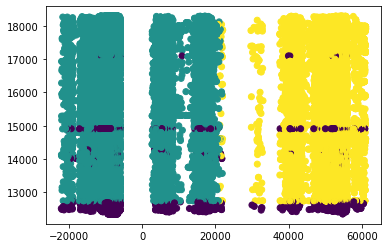

In [66]:
plt.scatter(X, y, c=labels)
plt.show()

In [18]:
from sklearn import metrics
from scipy.spatial.distance import cdist

inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                  'euclidean'),axis =1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Inertia')

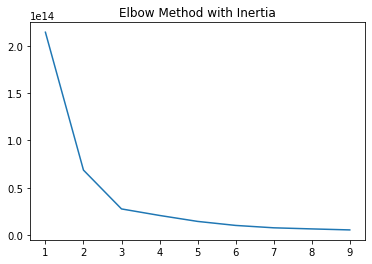

In [19]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

Text(0.5, 1.0, 'Elbow Method with Distortion')

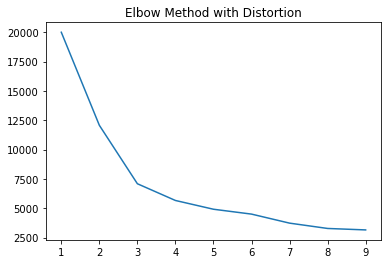

In [20]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

### 5. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

#### This dataset was huge, so I wasn't able to run it as a full set because of memory issues.  I ran a few chunks of 1000 lines each in order to get a feel for the results.  In each case the right number of clusters was two.  I determined this because when I bisected the longest line I crossed two vertical clusters.  I plan to experiment with chunksize, as that would have helped me run this in a more methodical way.  

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [49]:
df_ohe.dtypes

InvoiceNo                   int32
StockCode                 float32
Quantity                    int32
UnitPrice                 float32
CustomerID                  int32
Country_EIRE                uint8
Country_France              uint8
Country_Germany             uint8
Country_Spain               uint8
Country_United Kingdom      uint8
dtype: object

Recast columns to reduce memory usage.

In [47]:
df_ohe[['InvoiceNo', 'Quantity', 'CustomerID']] = df_ohe[['InvoiceNo', 'Quantity', 'CustomerID']].astype('int32')

In [48]:
df_ohe[['StockCode', 'UnitPrice']]=df_ohe[['StockCode', 'UnitPrice']].astype('float32')

Group 1

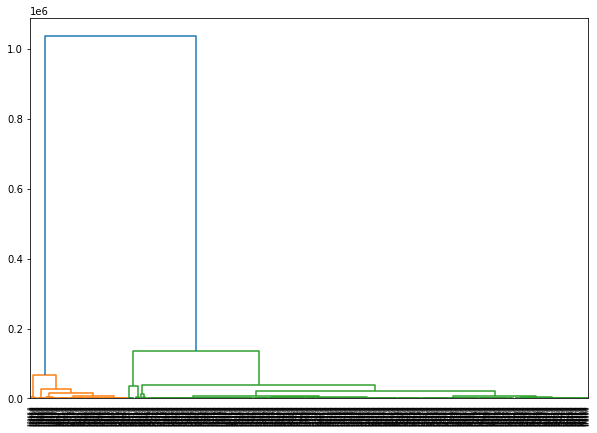

In [56]:
pca = PCA(n_components=1)
X1=X[:1000,:]
y1=y[:1000]
X1=pca.fit_transform(X1)

linked = linkage(X1,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels=list(y1))
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(X1)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

Group 2

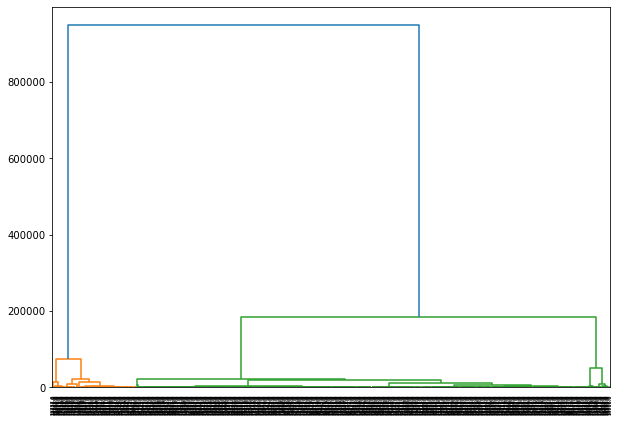

In [63]:
pca = PCA(n_components=1)
X2=X[1000:2000,:]
y2=y[1000:2000]
X2=pca.fit_transform(X2)

linked = linkage(X2,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels=list(y2))
plt.show()

Group 3

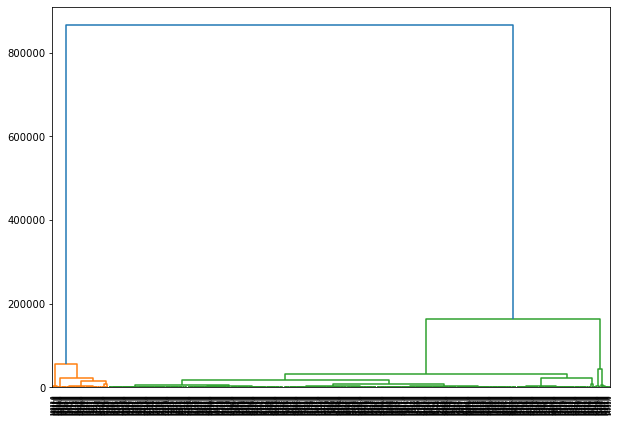

In [64]:
pca = PCA(n_components=1)
X3=X[358000:,:]
y3=y[358000:]
X3=pca.fit_transform(X3)

linked = linkage(X3,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels=list(y3))
plt.show()

### 6. Compare the results of 4 and 5. Which approach do you think is best? Why? 

#### In this case I think KMeans was the better approach.  It allowed for more robust clustering and required far less memory.  It also allows for better visualization in large datasets.  